In [50]:
# imports

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Dataset being loaded as dataframe
file = 'temperature_train.csv'

# datetime column parsed as Datetime type, datetime column as index
df = pd.read_csv(file, parse_dates=['datetime'], index_col='datetime')

# Deleting unnamed column which is introduced from csv file
df = df.drop(df.columns[[0]], axis=1)

df = df.iloc[:, :-6] # deleting non US cities, other than Montreal and Vancouver

# Convert Kelvin to Fahrenheit
df = df.applymap(lambda x: int(9/5 * (x-273) + 32))

#df2013 = df.iloc[:8760, :] # 2013 data all cities from Oct 2012 - Sep 2013
#df2014 = df.iloc[8760:17520, :] # 2014 data all cities
#df2015 = df.iloc[17520:26280, :] # 2015 data all cities

df2013 = df.iloc[2195:10955, :] # 2013 Jan - Dec
df2014 = df.iloc[10956:19715, :]
df2015 = df.iloc[19715:28475, :]

max = df.max().nlargest(3)
print('Top 3 warmest cities')
print(max)

min = df.min().nsmallest(3)
print('\nTop 3 coldest cities')
print(min)

max2013 = df2013.max().nlargest(3)
print('\nTop 3 warmest cities in 2013')
print(max2013)
max2014 = df2014.max().nlargest(3)
print('\nTop 3 warmest cities in 2014')
print(max2014)
max2015 = df2015.max().nlargest(3)
print('\nTop 3 warmest cities in 2015')
print(max2015)

min2013 = df2013.min().nsmallest(3)
print('\nTop 3 coldest cities in 2013')
print(min2013)
min2014 = df2014.min().nsmallest(3)
print('\nTop 3 coldest cities in 2014')
print(min2014)
min2015 = df2015.min().nsmallest(3)
print('\nTop 3 coldest cities in 2015')
print(min2015)

apr2013_df = df2013.iloc[2160:2880, :]
apr2014_df = df2014.iloc[2159:2879, :]
apr2015_df = df2015.iloc[2160:2880, :]
"""print(apr2013_df.head(1))
print(apr2013_df.tail(1))
print('2014-----')
print(apr2014_df.head(1))
print(apr2014_df.tail(1))
print('2015-----')
print(apr2015_df.head(1))
print(apr2015_df.tail(1))
"""

df_apr = apr2013_df
df_apr = df_apr.append(apr2014_df)
df_apr = df_apr.append(apr2015_df)

#print('-----------------')
#print(df_apr.head(1))
#print(df_apr.tail(1))
#print('-----------------')

#print(df_apr.head(1))
#print(df_apr.tail(1))
#print('-----------------')

#print(df_apr.head(1))
#print(df_apr.tail(1))

print('\n')
print(df.columns)

Top 3 warmest cities
Phoenix      116
Las Vegas    114
Dallas       106
dtype: int64

Top 3 coldest cities
Minneapolis   -23
Detroit       -21
Montreal      -21
dtype: int64

Top 3 warmest cities in 2013
Phoenix      116
Las Vegas    114
Dallas       106
dtype: int64

Top 3 warmest cities in 2014
Phoenix        112
Las Vegas      110
San Antonio    101
dtype: int64

Top 3 warmest cities in 2015
Phoenix      113
Las Vegas    110
Dallas       105
dtype: int64

Top 3 coldest cities in 2013
Montreal      -21
Minneapolis   -18
Kansas City    -5
dtype: int64

Top 3 coldest cities in 2014
Vancouver     -18
Minneapolis   -16
Denver        -13
dtype: int64

Top 3 coldest cities in 2015
Minneapolis    -23
Detroit        -21
Indianapolis   -18
dtype: int64


Index(['Vancouver', 'Portland', 'San Francisco', 'Seattle', 'Los Angeles',
       'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque', 'Denver',
       'San Antonio', 'Dallas', 'Houston', 'Kansas City', 'Minneapolis',
       'Saint Louis', 'Ch

## 1. Which are the three warmest cities ? Which are the three coldest cities ?

### The three warmest cities in the given data are Phoenix, Las Vegas and Dallas and it can be seen temperatures reaching max during the month of July.

### The three coldest cities are Minneapolis, Montreal, Detriot. Coldest temperatures are seen in the month of January and December. Vancouver has knocked down Minneapolies to second coldest in the year 2014, which can be attributed to the cold front on Nov 30th with the temperature varying between -18F and -9F between Nov 30 2014 and Dec 02 2014

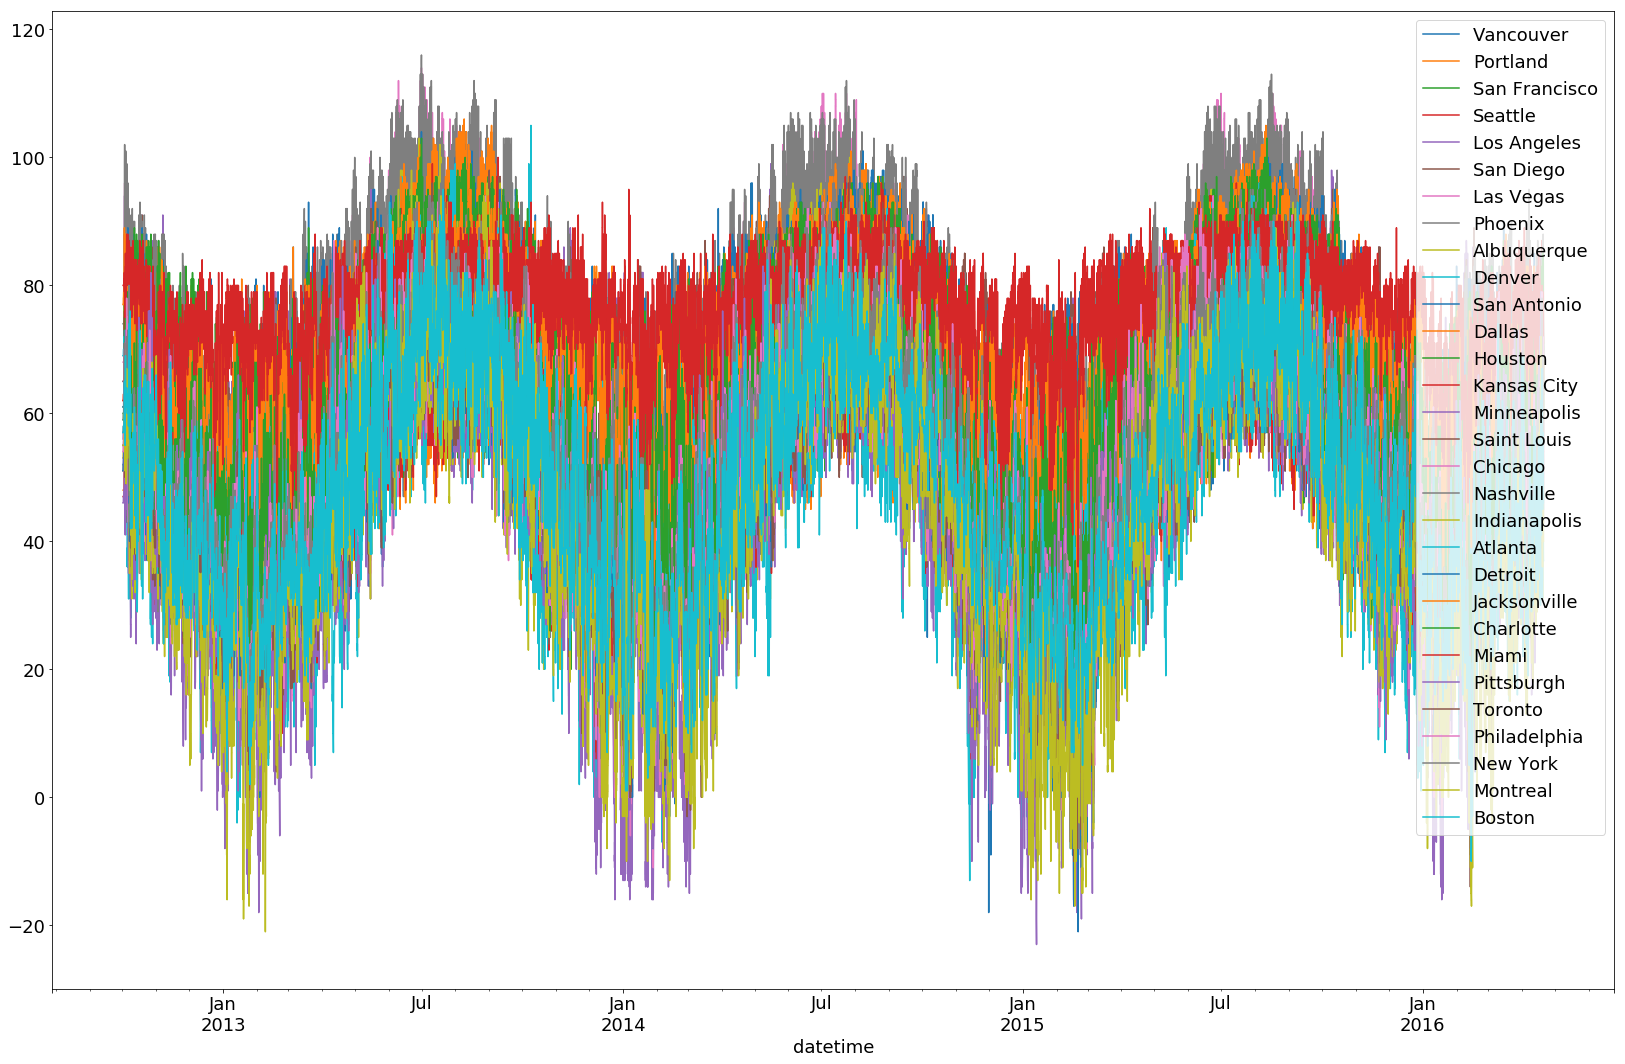

In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (28,18)
plt.rcParams.update({'font.size': 18})
df.plot()

In [76]:
#print(df2014[df2014.Vancouver < 0])


## Vancouver's dip in temperature in Nov 2014

                     Vancouver
datetime                      
2014-11-30 19:00:00        -18
2014-11-30 20:00:00        -11
2014-12-02 19:00:00         -9


Text(0.5,1,"Vancouver's dip in temperature in Nov 2014")

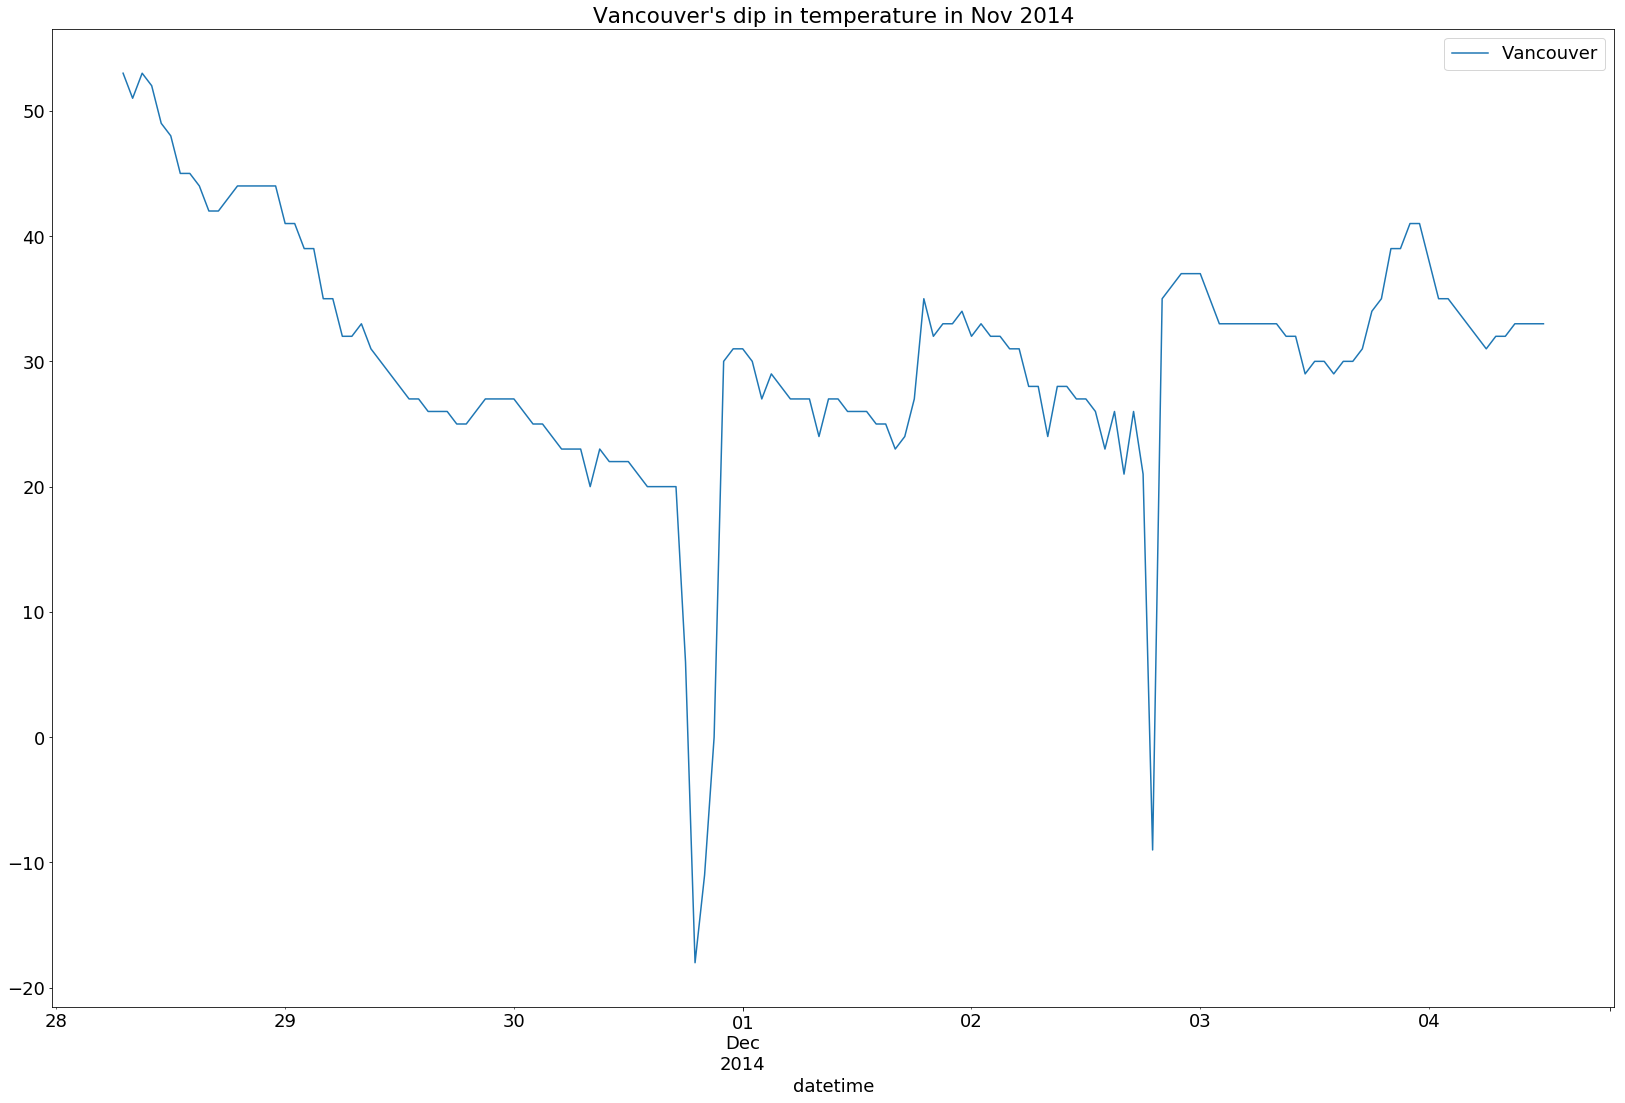

In [57]:
#fig = plt.figure()
df_van = df2014.iloc[7950: 8100, :1]
ax = df_van.plot()
#plt.scatter(df.index, df['Vancouver'])
#plt.scatter(df.index, df['Seattle'])
#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

print(df_van[df_van.Vancouver < 0])
ax.set_title('Vancouver\'s dip in temperature in Nov 2014')

## Pittsburgh's temperature trend

### Pittsburgh's temperature trend as seen above has winter months from November to March, temperature starts going up in mid April , summer months typically being from May to September. Feburary of 2015 has been the coldest in the above data set. Feburary 2015 temperatures have been the second lowest temperatures from 1948.

Text(0.5,1,"Pittsburgh's temperature trend")

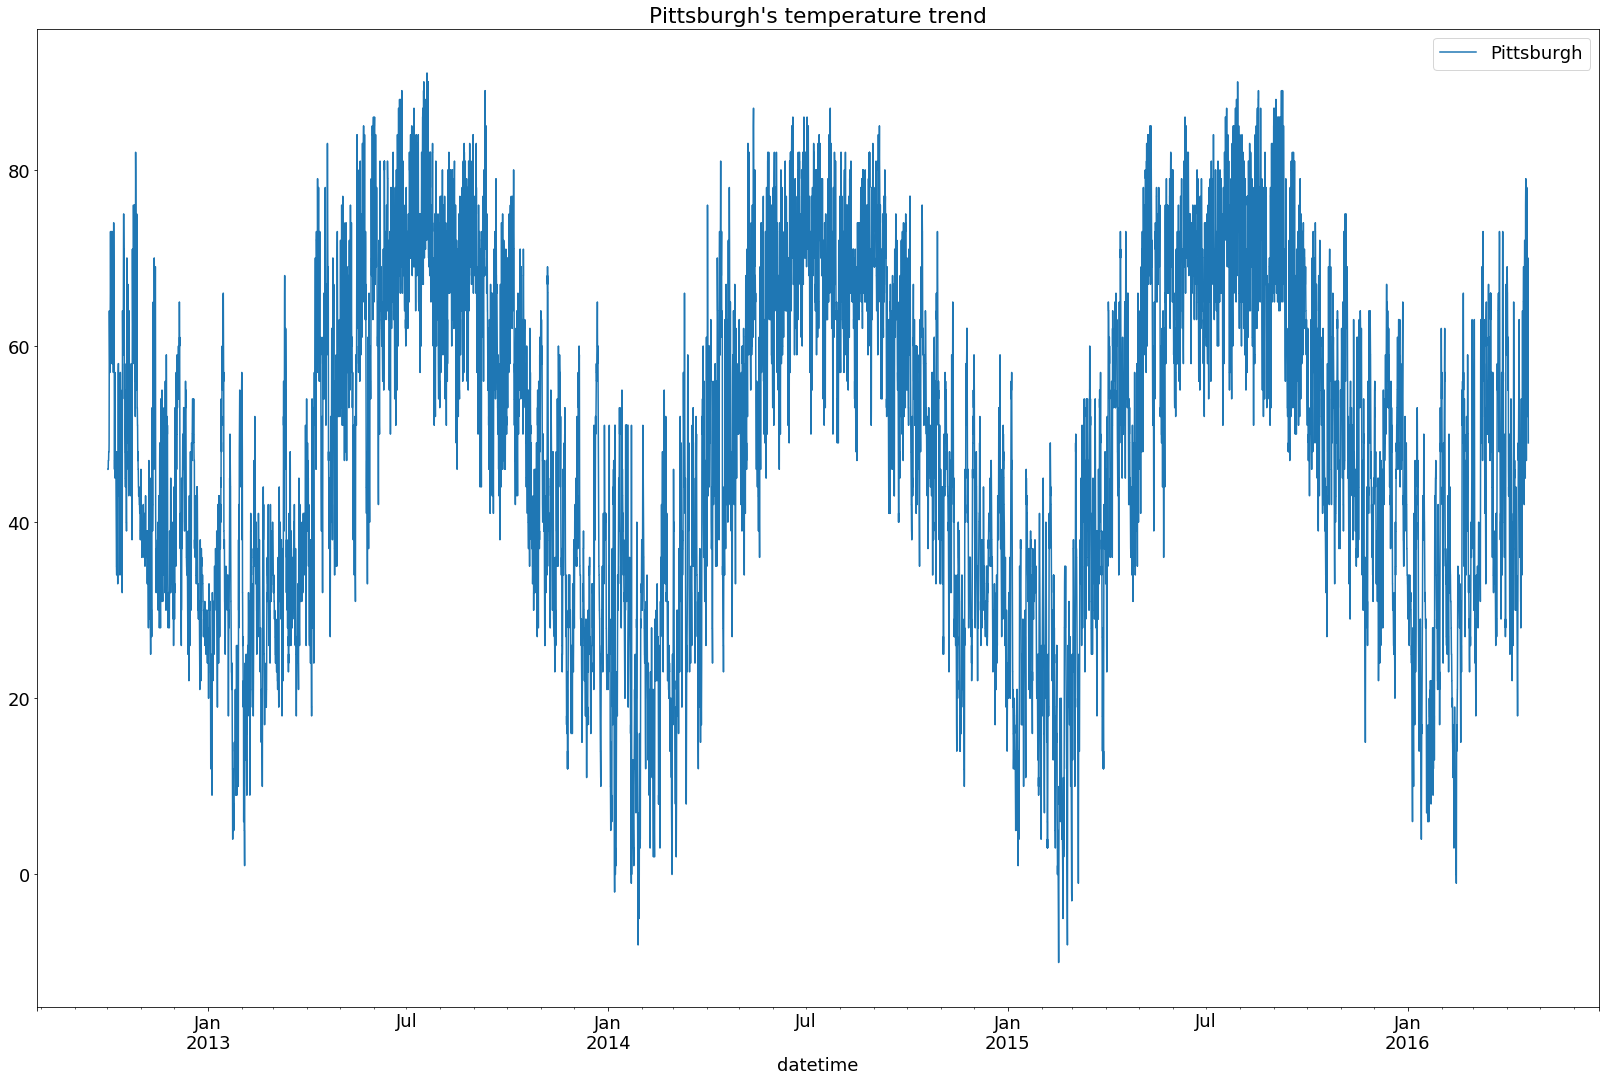

In [56]:
#Temperature trend in Pittsburgh
df_pit = df.iloc[:, 24:25]
ax1 = df_pit.plot()
ax1.set_title('Pittsburgh\'s temperature trend')


## 2. Which cities have Average 75F or more in the month of April, during the time of spring break?

### From the graph below, we can see the cities which has average of 75F or more in the month of April.
### Las Vegas, Phoenix, San Antonio, Dallas, Houston, Jacksonville, Miami

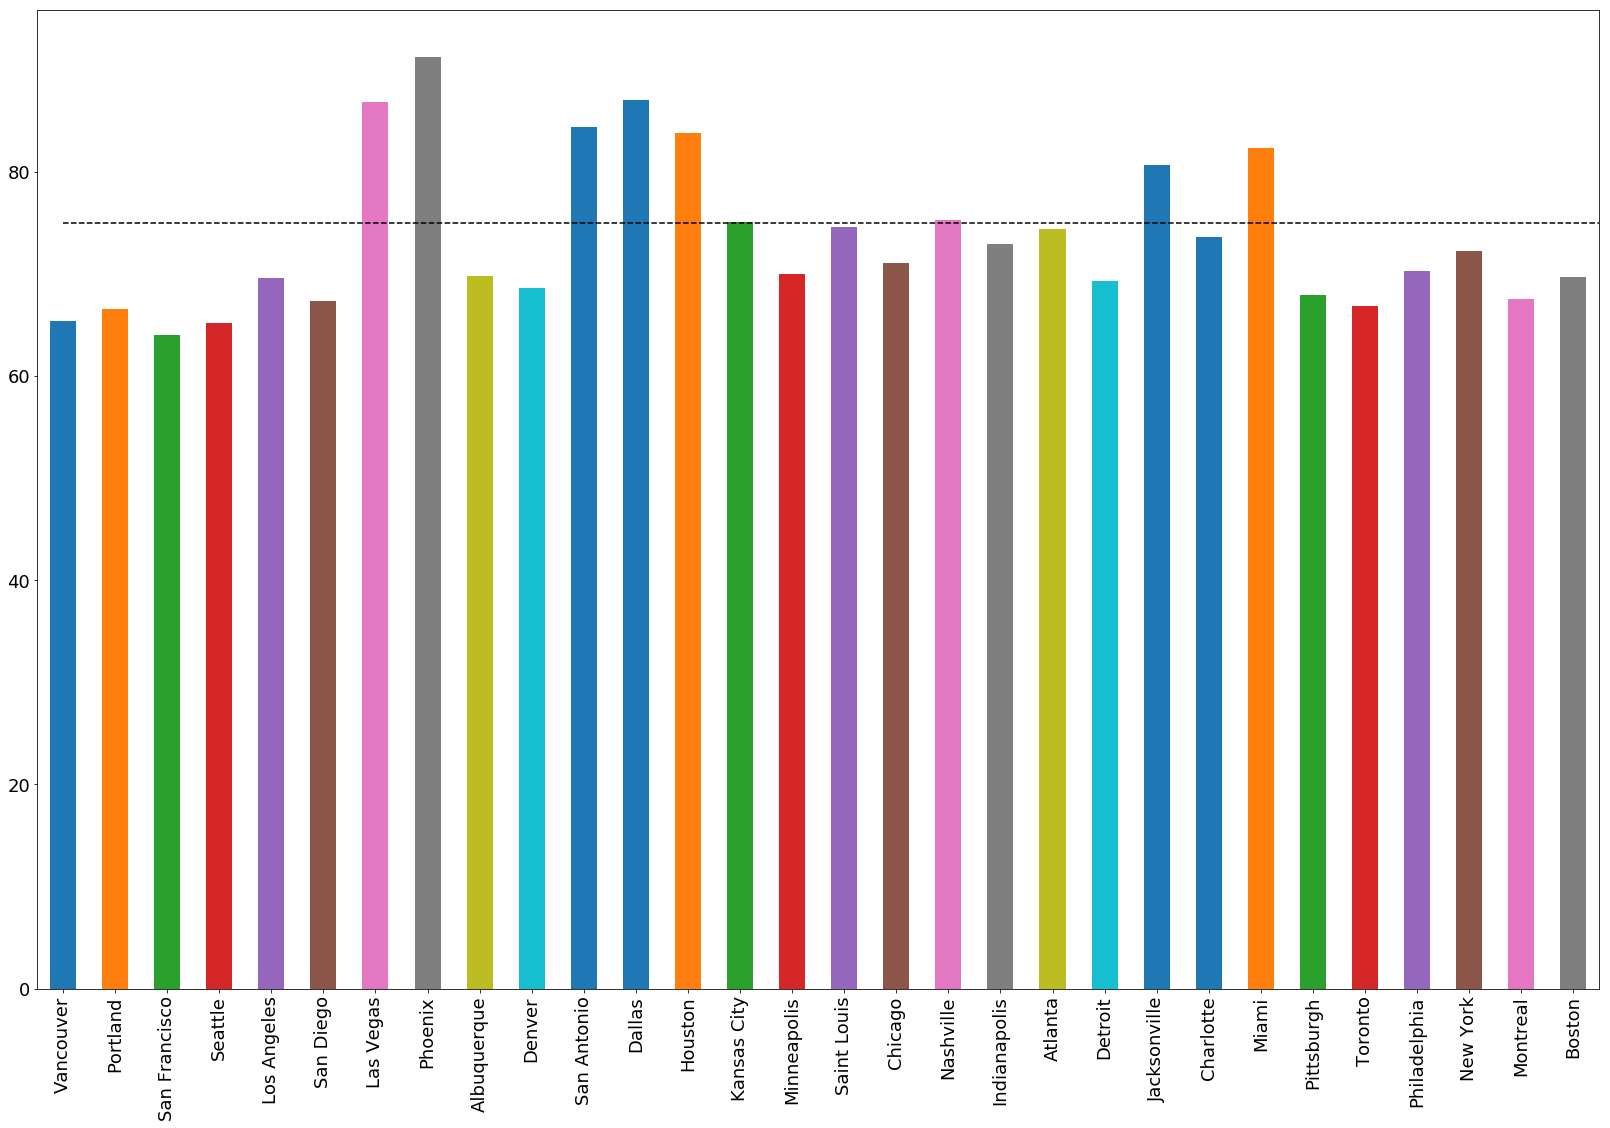

In [58]:
apr_df = df2013.iloc[5039:5783, :]
#print(apr_df.head(1))
#print(apr_df.tail(1))
apr_df.mean(axis=0).plot(kind='bar')
mean_df = apr_df.mean(axis=0)
cutoff = 75
plt.plot([0., len(mean_df)], [cutoff, cutoff], "k--")

## None of the regions are negatively correlated which implies that the cities experience winter and summer around the same time. The level of correlation is different among the cities. There are strongly related cities like San Antonio, Dallas, Houston in the Southern region and Detriot, Pittsburgh, Toronta, Philadelphia, New York, Montreal, Boston in the NorthEast region 
## Western  Region
### San Francisco, San Diego, Las Vegas, Phoenix, Albuquerque


##  Southern states
### San Antonio, Dallas, Houston are strongly correlated with temperatures increasing and decreasing in the same way.


## NorthWestern Region
### Portland, Seattle, Vancouver being strongly correlated


## NorthEast region
### Detriot, Pittsburgh, Totonto, Philadelphia, New York, Montreal, Boston

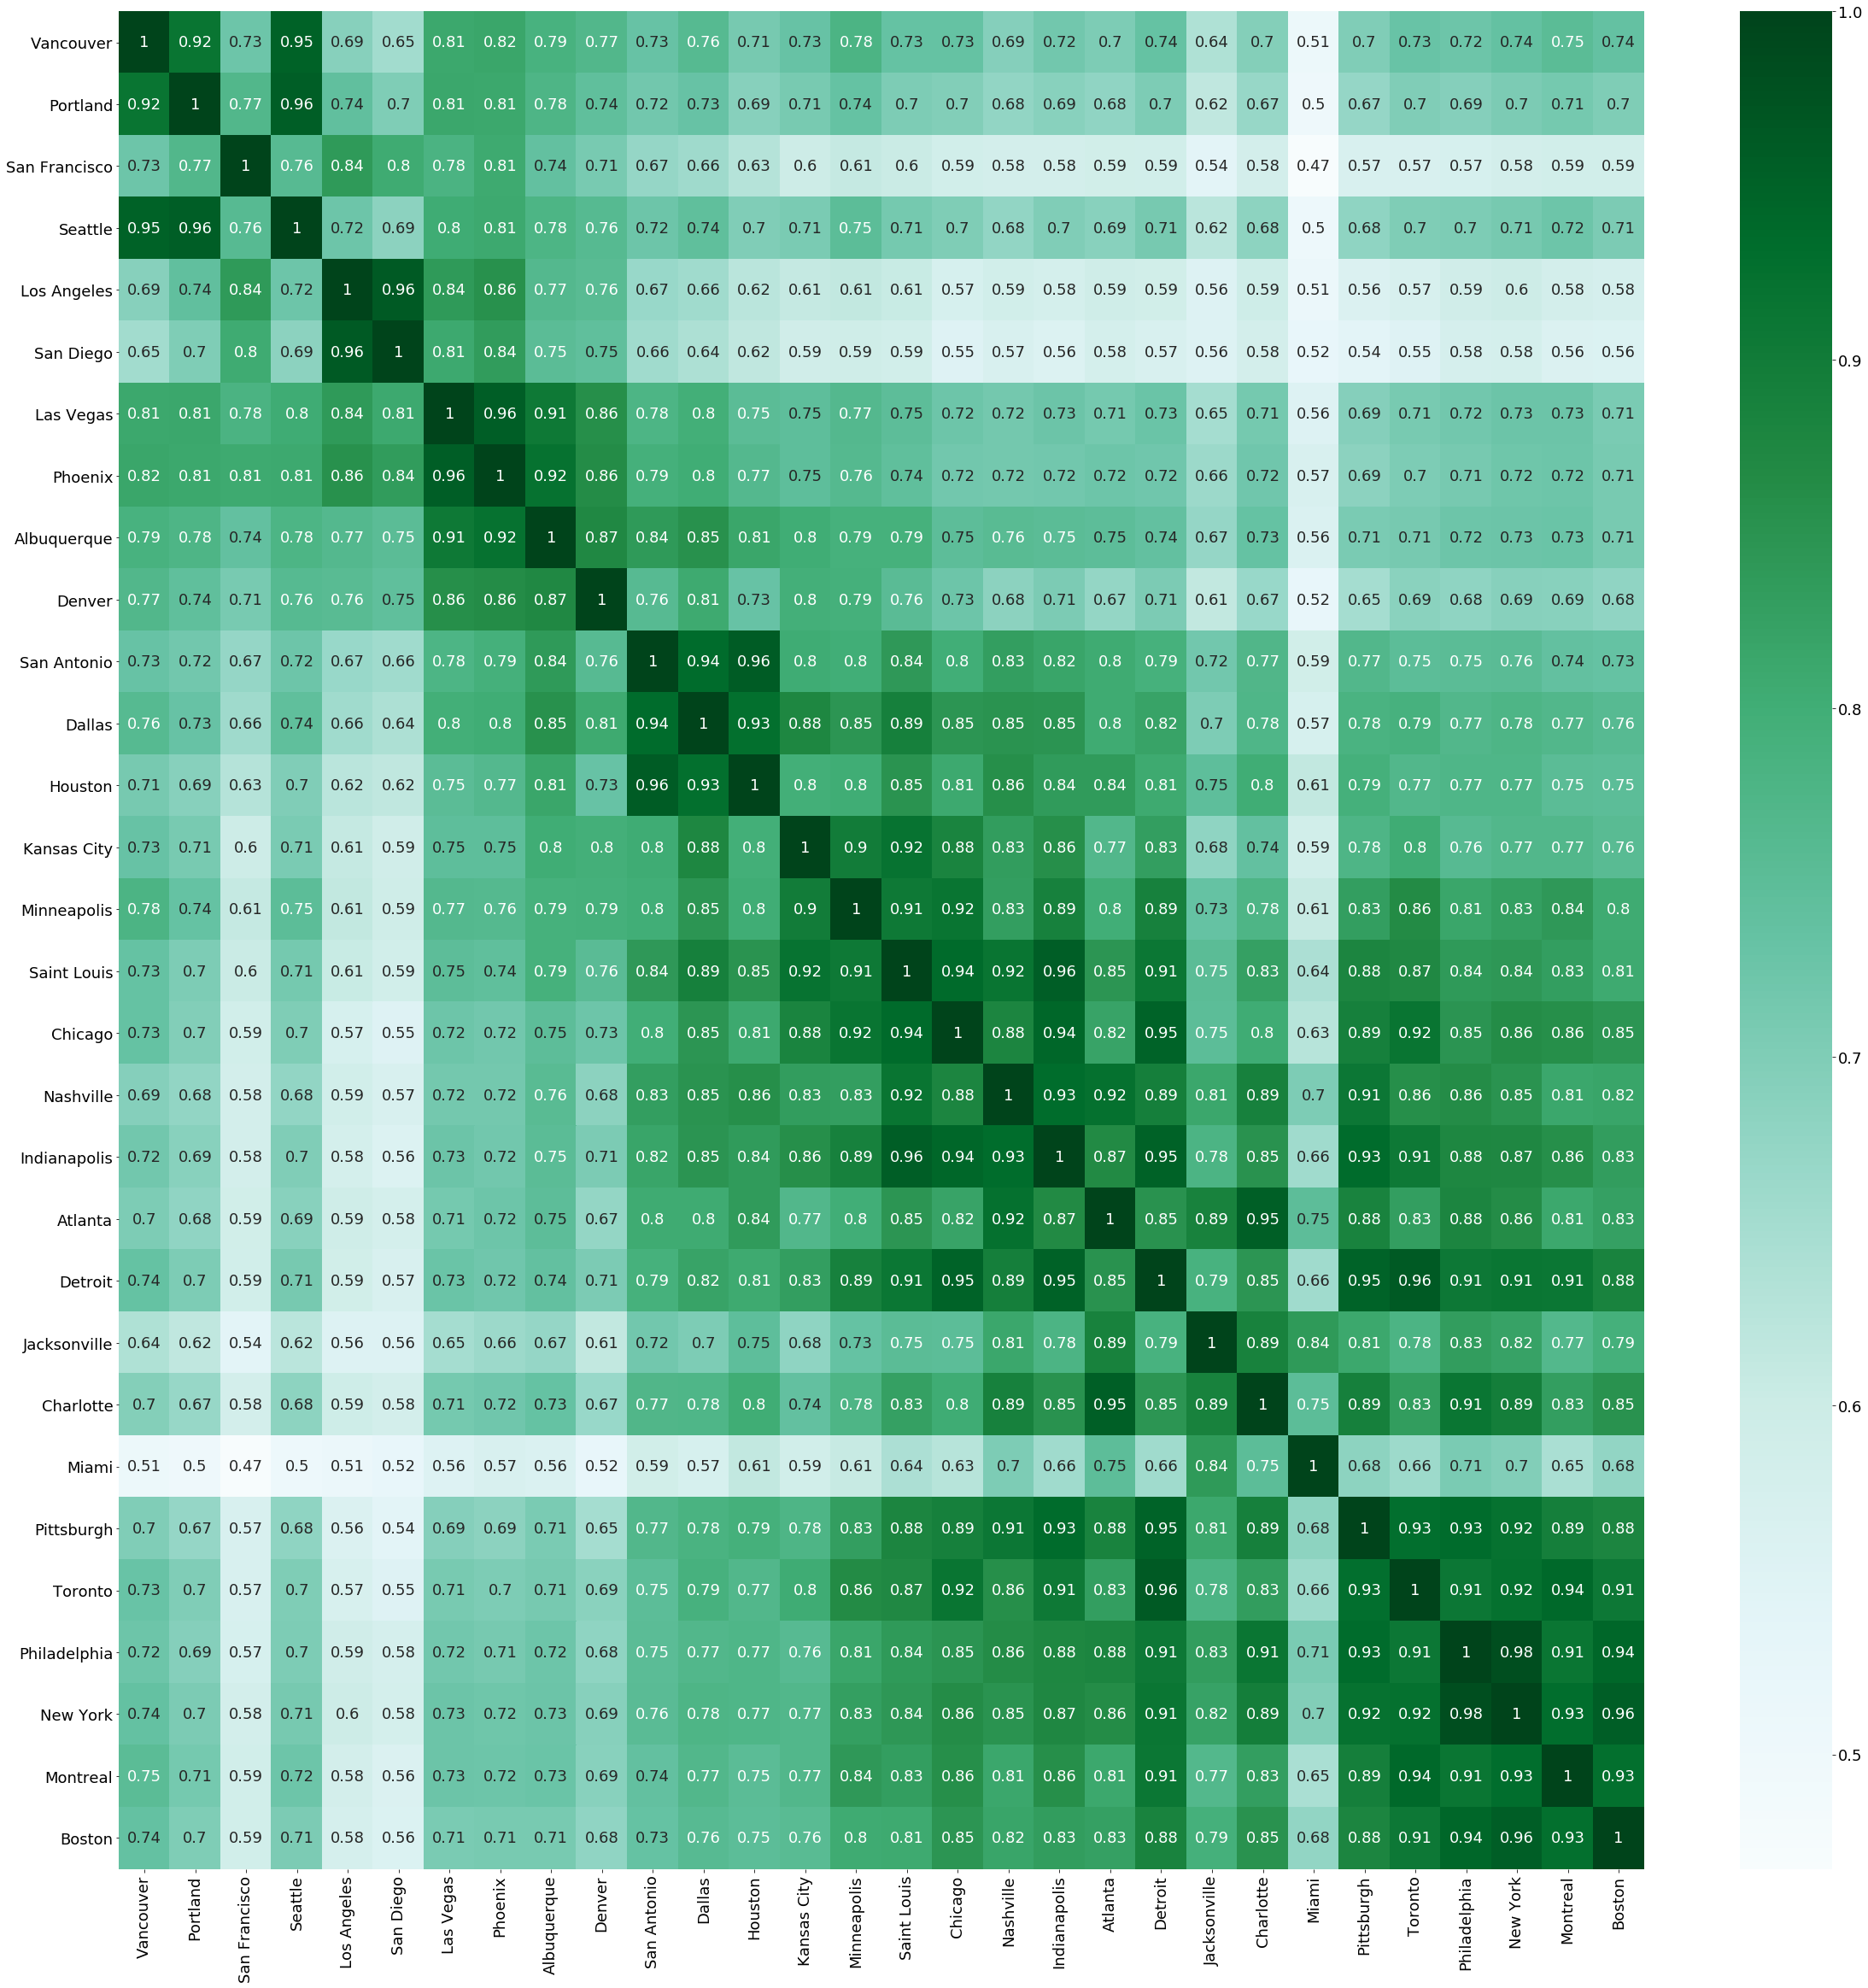

In [48]:
plt.figure(figsize=(40,40)) 
sns.heatmap(df.corr(), cmap='BuGn', annot=True)

In [ ]:
#